In [1620]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import scipy.stats as stats
import datetime

%matplotlib inline

import seaborn as sns

import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

pd.options.display.max_colwidth = 200
pd.options.display.max_rows=100
pd.options.display.max_columns=500

import warnings
warnings.filterwarnings('ignore')

## 1. Read the Data

In [1621]:
housing = pd.read_csv("train.csv")

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Data Understanding

In [1622]:
housing.shape

(1460, 81)

In [1623]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1624]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1625]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Observation:
- The SalePrice mean & median values are not close indicating NO normal distribution.

In [1626]:
# checking null values
NA_col = housing.isnull().sum()

# find out columns which have nulls
NA_col = NA_col[NA_col > 0]

# Percentage of columns missing
print(round(100*NA_col[NA_col > 0]/len(housing),2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


### Observation:
- Columns having more than 90% missing values will be dropped. They are:
    - Alley
    - PoolQC
    - MiscFeature
- Id column will also be dropped.

In [1627]:
housing.drop(['Alley','PoolQC','MiscFeature','Id'],axis=1,inplace = True)

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [1628]:
housing.shape

(1460, 77)

In [1629]:
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740


### Observation:
#### Following variables have more % of missing values.
- Fence = ~ 81%
- FireplaceQu = ~ 47%
- LotFrontage	 = ~ 18%

In [1630]:
housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [1631]:
housing['FireplaceQu'].value_counts()/len(housing['FireplaceQu'])*100

Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

In [1632]:
housing['LotFrontage'].value_counts()/len(housing['LotFrontage'])*100

60.0     9.794521
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
           ...   
106.0    0.068493
38.0     0.068493
138.0    0.068493
140.0    0.068493
137.0    0.068493
Name: LotFrontage, Length: 110, dtype: float64

In [1633]:
housing['GarageCond'].value_counts()/len(housing['GarageCond'])*100

TA    90.821918
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

In [1634]:
housing['GarageType'].value_counts()/len(housing['GarageType'])*100

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [1635]:
housing['GarageYrBlt'].value_counts()/len(housing['GarageYrBlt'])*100

2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
2007.0    3.356164
1977.0    2.397260
1998.0    2.123288
1999.0    2.054795
2008.0    1.986301
1976.0    1.986301
2000.0    1.849315
2002.0    1.780822
1968.0    1.780822
1950.0    1.643836
1993.0    1.506849
2009.0    1.438356
1965.0    1.438356
1966.0    1.438356
1962.0    1.438356
1958.0    1.438356
2001.0    1.369863
1996.0    1.369863
1957.0    1.369863
1970.0    1.369863
1960.0    1.301370
1997.0    1.301370
1978.0    1.301370
1954.0    1.301370
1974.0    1.232877
1994.0    1.232877
1995.0    1.232877
1964.0    1.232877
1959.0    1.164384
1963.0    1.095890
1990.0    1.095890
1956.0    1.095890
1969.0    1.027397
1979.0    1.027397
1980.0    1.027397
1967.0    1.027397
1988.0    0.958904
1973.0    0.958904
1940.0    0.958904
1920.0    0.958904
1972.0    0.958904
1961.0    0.890411
1971.0    0.890411
1955.0    0.890411
1992.0    0.890411
1953.0    0.821918
1987.0    0.753425
1948.0    0.753425
1985.0    0.

In [1636]:
housing['GarageFinish'].value_counts()/len(housing['GarageFinish'])*100

Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: GarageFinish, dtype: float64

In [1637]:
housing['GarageQual'].value_counts()/len(housing['GarageQual'])*100

TA    89.794521
Fa     3.287671
Gd     0.958904
Po     0.205479
Ex     0.205479
Name: GarageQual, dtype: float64

In [1638]:
housing['BsmtExposure'].value_counts()/len(housing['BsmtExposure'])*100

No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64

In [1639]:
housing['BsmtFinType2'].value_counts()/len(housing['BsmtFinType2'])*100

Unf    86.027397
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

In [1640]:
housing['BsmtFinType1'].value_counts()/len(housing['BsmtFinType1'])*100

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: BsmtFinType1, dtype: float64

In [1641]:
housing['BsmtCond'].value_counts()/len(housing['BsmtCond'])*100

TA    89.794521
Gd     4.452055
Fa     3.082192
Po     0.136986
Name: BsmtCond, dtype: float64

In [1642]:
housing['BsmtQual'].value_counts()/len(housing['BsmtQual'])*100

TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64

In [1643]:
housing['MasVnrArea'].value_counts()/len(housing['MasVnrArea'])*100

0.0      58.972603
72.0      0.547945
180.0     0.547945
108.0     0.547945
120.0     0.479452
           ...    
651.0     0.068493
337.0     0.068493
415.0     0.068493
293.0     0.068493
621.0     0.068493
Name: MasVnrArea, Length: 327, dtype: float64

In [1644]:
housing['MasVnrType'].value_counts()/len(housing['MasVnrType'])*100

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [1645]:
housing['Street'].value_counts()/len(housing['Street'])*100

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

In [1646]:
housing['Utilities'].value_counts()/len(housing['Utilities'])*100

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

### Observation:
#### From the above calculations, following variables who do not add any variance to the data can be dropped.
- Fence
- FireplaceQu
- BsmtCond
- BsmtFinType2
- BsmtExposure
- GarageQual
- GarageYrBlt
- GarageCond
- MasVnrArea
- Street
- Utilities

## 3. Data Treatment

In [1647]:
housing.drop(['Fence','FireplaceQu','BsmtCond','BsmtFinType2','BsmtExposure','GarageQual','GarageYrBlt','GarageCond','MasVnrArea','Street','Utilities'],axis=1,inplace = True)


In [1648]:
housing.shape

(1460, 66)

In [1649]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,GLQ,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,GLQ,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,ALQ,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,GLQ,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [1650]:
# checking null values
NA_col = housing.isnull().sum()
# find out columns which have nulls
NA_col = NA_col[NA_col > 0]
# % of columns missing
print(round(100*NA_col[NA_col > 0]/len(housing),2))

LotFrontage     17.74
MasVnrType       0.55
BsmtQual         2.53
BsmtFinType1     2.53
Electrical       0.07
GarageType       5.55
GarageFinish     5.55
dtype: float64


### Imputing Missing Values

In [1651]:
def treat_Missing_Values(df):    
    
    # checking null values
    NA_col = df.isnull().sum()
    # find out columns which have nulls
    NA_col = NA_col[NA_col > 0]

    for col in NA_col.index:
        if df[col].dtype.name == 'object':
            # impute mode
            df[col].fillna(housing[col].mode()[0], inplace=True)
            
        elif df[col].dtype.name == 'float64' or df[col].dtype.name == 'int64' or df[col].dtype.name == 'int32':
            # impute median
            df[col] = df[col].fillna((df[col].median()))
            
        else:
            print('Unable to detect the datatype for col - ', col)
            
    return df

In [1652]:
housing = treat_Missing_Values(housing)

In [1653]:
# checking null values
round(housing.isnull().sum()/len(housing.index),2)[round(housing.isnull().sum()/ len(housing.index),2).values>0.00]

Series([], dtype: float64)

In [1654]:
housing.shape

(1460, 66)

## 4. EDA - Finding the variables which are significant to the target variable.

### Correlation between numerical variables

<AxesSubplot:>

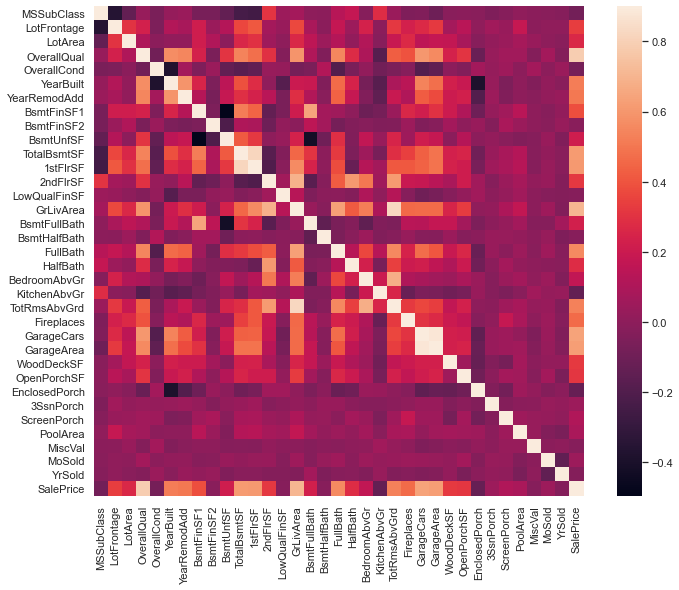

In [1655]:
#Correlation map to see how features are correlated with SalePrice
corrmat = housing.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### Most correlated variables present in the data

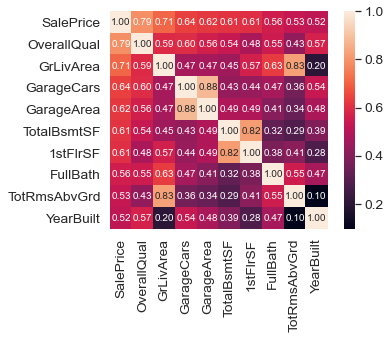

In [1656]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Observation:
- OverallQual - It is obvious that having a good quality house would fetch bigger price.
- Grlivarea - More the area of the floor above the ground floor, greater is the price.
- GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF - All these variables having higher correlation make sense.

In [1657]:
corr_val = housing[list(housing.dtypes[housing.dtypes != 'object'].index)].corr()

In [1658]:
corr_coef = corr_val[corr_val['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


### Pairplots to check for any data pattern

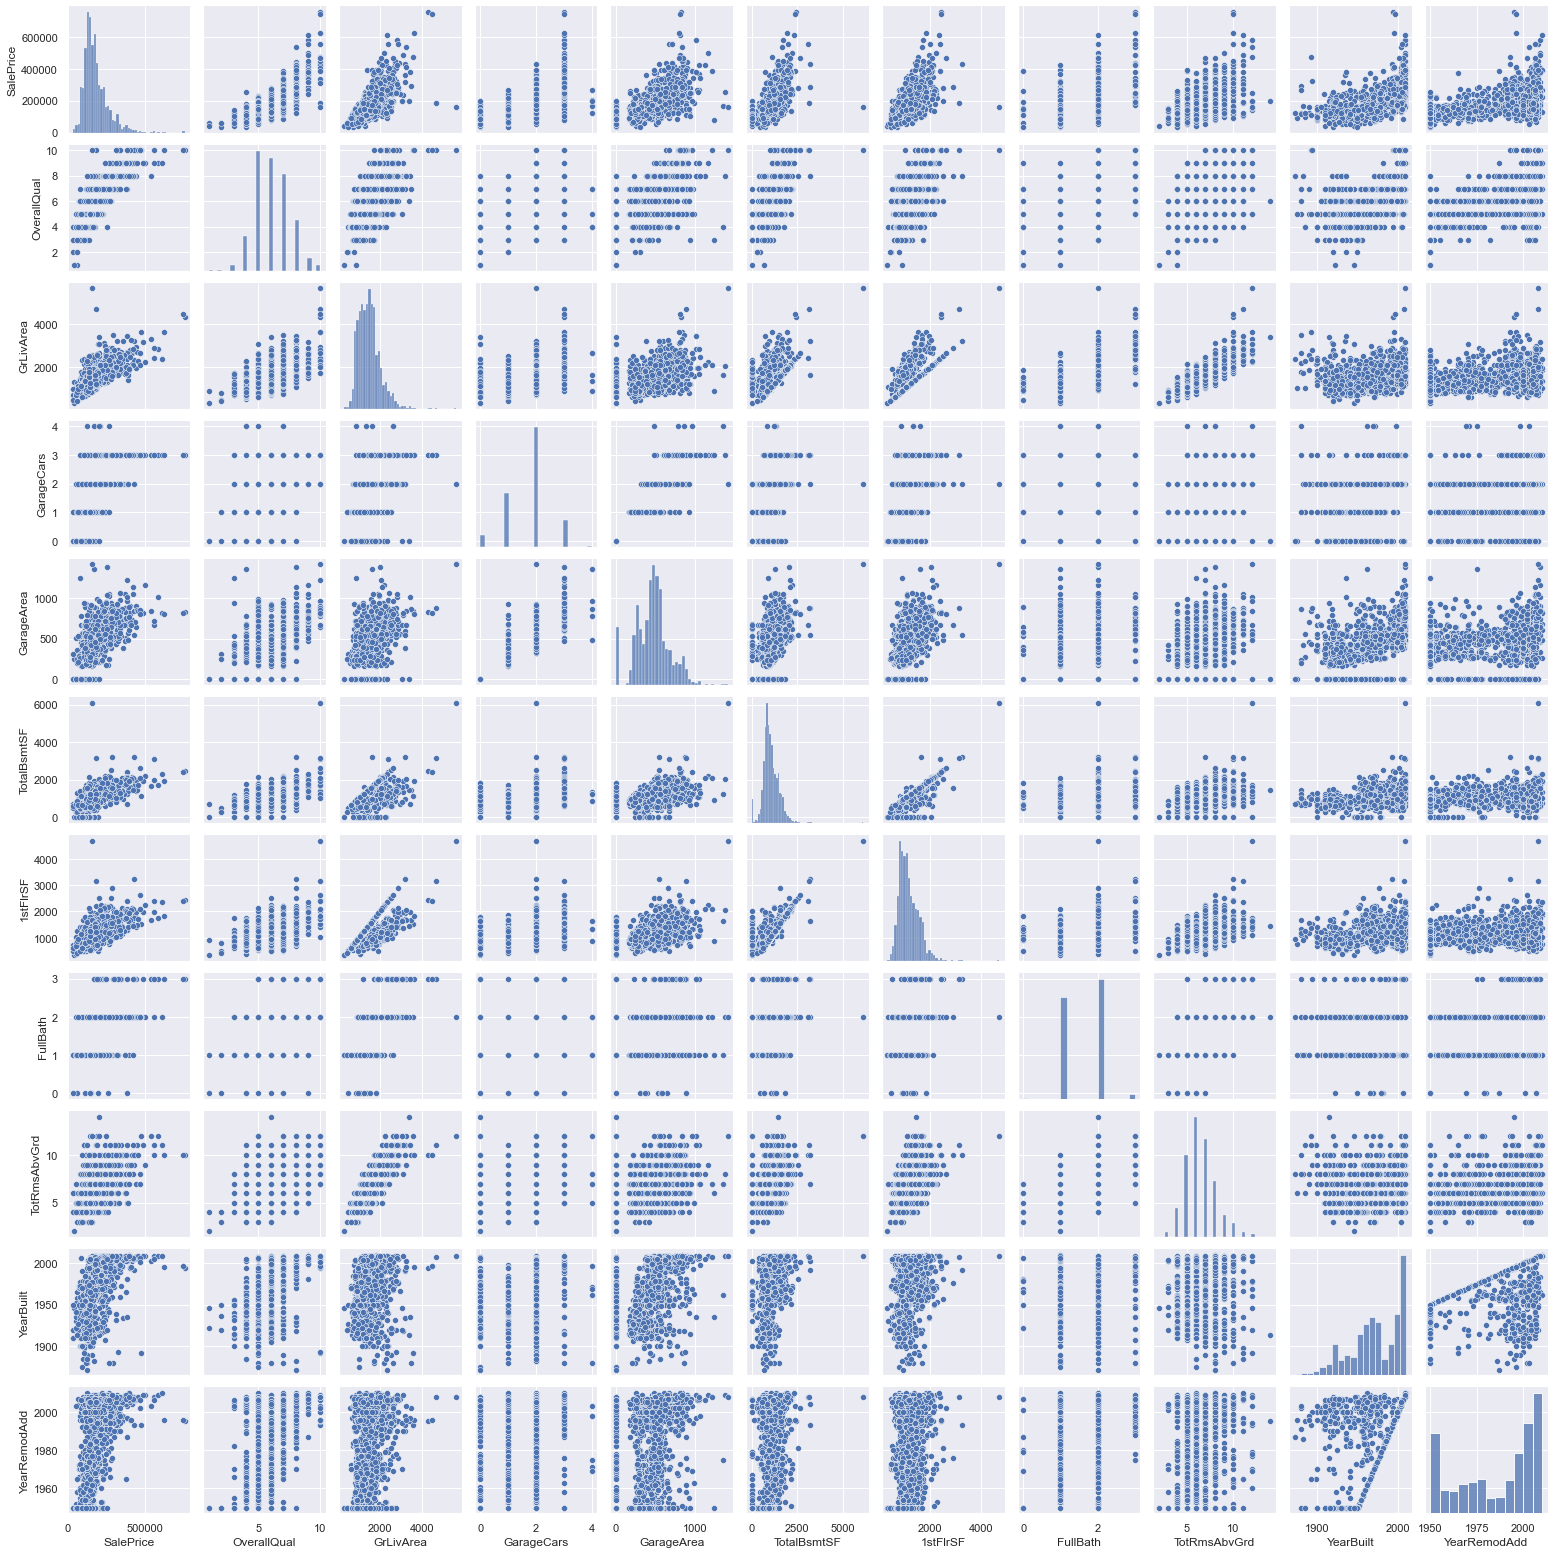

In [1659]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
sns.pairplot(housing[cols],height = 2)
plt.show()

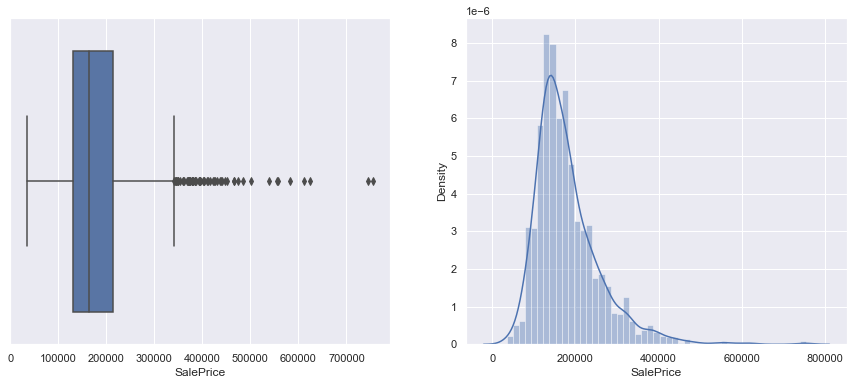

In [1660]:
# Let us check the SalePrice as well
f, axes = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(housing['SalePrice'],  orient='v' , ax=axes[0])
sns.distplot(housing['SalePrice'], ax=axes[1])
plt.show()

### Observation:
#### The SalePrice is right skewed.

### 5. Feature Engineering

In [1661]:
def label_encoding(colNames):
    for colName in colNames:
        unique_vals = housing[colName].unique()
        map_vals = {}
        for idx, val in enumerate(unique_vals):
            map_vals[val] = idx
        housing[colName] = housing[colName].map(map_vals)

In [1662]:
cat_col_list = ['LandSlope', 'ExterQual', 'BsmtQual', 
                'BsmtFinType1', 'HeatingQC', 'CentralAir', 'KitchenQual', 
                'GarageFinish', 'ExterCond', 'LotShape']
label_encoding(cat_col_list)

In [1663]:
housing[cat_col_list].head()

,LandSlope,ExterQual,BsmtQual,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,GarageFinish,ExterCond,LotShape
0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,1,1,1,1,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,1


In [1664]:
dummy_col_names = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']
dummies = pd.get_dummies(housing[dummy_col_names], drop_first = True)
housing = pd.concat([housing, dummies], axis = 1)
housing.drop(dummy_col_names, axis = 1, inplace = True)

In [1665]:
housing.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,0,0,7,5,2003,2003,0,0,0,0,706,0,150,856,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,0,0,6,8,1976,1976,1,0,0,1,978,0,284,1262,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,1,0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,1,0,7,5,2001,2002,0,0,0,0,486,0,434,920,0,0,920,866,0,1786,1,0,2,1,3,1,0,6,1,0,2,608,0,42,0,0,0,0,0,9,2008,223500,0

In [1666]:
housing.shape

(1460, 190)

In [1667]:
housing.shape

(1460, 190)

In [1668]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 190 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(1), int64(44), uint8(145)
memory usage: 720.1 KB


In [1669]:
# Transform SalePrice
housing['SalePrice'] = np.log1p(housing['SalePrice'])

### 6. Model Building

In [1670]:
# Create train and test data
df_train, df_test = train_test_split(housing, train_size=0.7, test_size=0.3, random_state=100)

In [1671]:
# Scale data
scaler_col = ['MSSubClass','LotArea','OverallQual','OverallCond', 'BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF',
              'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
              'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[scaler_col] = scaler.fit_transform(df_train[scaler_col])
df_test[scaler_col] = scaler.transform(df_test[scaler_col])

In [1672]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,67.0,-0.473765,0,0,-0.779861,0.383154,1925,1950,1,0,1,3,0.043512,-0.293313,-0.374367,-0.430911,2,1,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,1,-0.935650,-0.925422,1,-2.366798,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,4,2008,-1.335436,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
318,0.035976,90.0,-0.056845,0,1,0.649651,-0.533005,1993,1993,0,0,0,0,1.160345,-0.293313,-0.454644,0.621579,0,0,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,0,1.556976,0.623522,0,1.645101,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,4,2009,1.125546,0,0,1,0,0,1

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

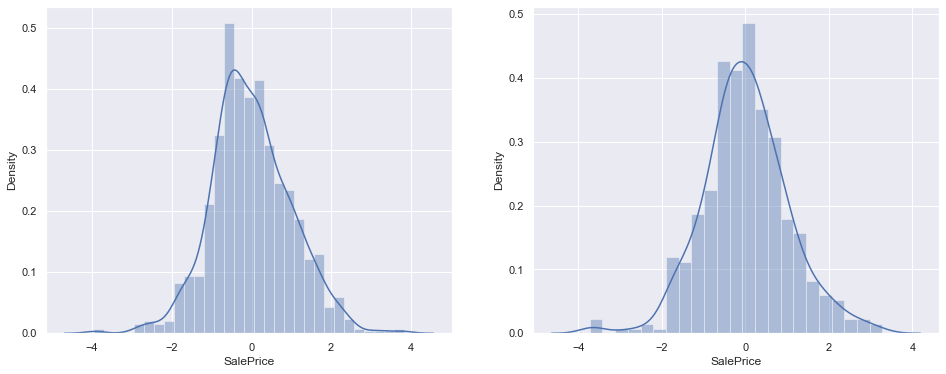

In [1673]:
# Let us check if the target variable is normal in both train and test dataset
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [1674]:
# Create X and y
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

### Simple Linear Regression

In [1675]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9535233151874415
0.8626905001828276


In [1676]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [1677]:
#Calculation of MSE & RMSE
mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse = mse**0.5

#Calculate the RSS
rss = np.sum(np.square(y_test - y_test_pred))

print(rss, rmse)

62.95322169607324 0.6157238304701107


In [1678]:
# Simple Linear Regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-9.999, 'constant'),
 (8.076, 'RoofMatl_Membran'),
 (7.674, 'RoofMatl_WdShngl'),
 (7.634, 'RoofMatl_Tar&Grv'),
 (7.619, 'RoofMatl_Roll'),
 (7.45, 'RoofMatl_CompShg'),
 (7.379, 'RoofMatl_Metal'),
 (7.187, 'RoofMatl_WdShake'),
 (-4.303, 'Condition2_PosN'),
 (1.091, 'MSZoning_RL'),
 (1.089, 'MSZoning_FV'),
 (-1.081, 'Functional_Sev'),
 (1.076, 'MSZoning_RH'),
 (0.962, 'MSZoning_RM'),
 (-0.836, 'Condition2_RRAe'),
 (0.795, 'Condition2_PosA'),
 (0.68, 'Heating_Wall'),
 (0.647, 'SaleType_ConLD'),
 (0.573, 'RoofStyle_Shed'),
 (0.505, 'Exterior1st_BrkFace'),
 (0.488, 'Heating_GasW'),
 (0.428, 'Neighborhood_Crawfor'),
 (-0.392, 'Exterior1st_BrkComm'),
 (0.369, 'SaleCondition_AdjLand'),
 (0.361, 'Heating_GasA'),
 (0.334, 'Exterior1st_Stone'),
 (-0.332, 'Neighborhood_MeadowV'),
 (0.319, 'Heating_OthW'),
 (0.318, 'Functional_Typ'),
 (0.316, 'Exterior1st_WdShing'),
 (0.314, 'Exterior1st_VinylSd'),
 (0.305, 'Exterior1st_Stucco'),
 (-0.297, 'Functional_Maj2'),
 (0.293, 'Exterior1st_ImStucc'),
 (0.2

In [1679]:
# RFE
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [1680]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

In [1681]:
col = X_train.columns[rfe.support_]

In [1682]:
col

Index(['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', 'GrLivArea',
       'GarageCars', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Condition1_Norm',
       'Condition1_PosA', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRNn', 'HouseStyle_2.5Fin',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_VinylSd', 'Exterior1st_WdShing',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall',
       'Functional_Min1', 'Functional_Min2', 'Functional_Sev',
       'Functional_Typ', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New',
       'SaleType_Oth', 

In [1683]:
# Modify the X_train and X_test
X_train = X_train[col]
X_test = X_test[col]

In [1684]:
X_train.shape

(1021, 50)

In [1685]:
X_test.shape

(438, 50)

## Lasso Regression Model

In [1686]:
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8743455637207288
0.8581283795772723


In [1687]:
#Calculation of MSE & RMSE
mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse = mse**0.5

#Calculate the RSS
rss = np.sum(np.square(y_test - y_test_pred))

print(rss, rmse)

65.04484820602448 0.6207756859828756


In [1688]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col = col.insert(0,'Constant')
list(zip(col,model_parameter))

[('Constant', -1.151),
 ('OverallQual', 0.349),
 ('BsmtFinSF1', 0.093),
 ('TotalBsmtSF', 0.065),
 ('CentralAir', -0.401),
 ('GrLivArea', 0.322),
 ('GarageCars', 0.155),
 ('MSZoning_FV', 0.502),
 ('MSZoning_RH', 0.335),
 ('MSZoning_RL', 0.463),
 ('MSZoning_RM', 0.16),
 ('LotConfig_CulDSac', 0.218),
 ('Neighborhood_BrDale', -0.276),
 ('Neighborhood_Crawfor', 0.331),
 ('Neighborhood_NridgHt', 0.187),
 ('Condition1_Norm', 0.2),
 ('Condition1_PosA', 0.171),
 ('Condition2_PosA', 0.0),
 ('Condition2_PosN', -2.496),
 ('Condition2_RRAe', -0.0),
 ('Condition2_RRNn', 0.0),
 ('HouseStyle_2.5Fin', -0.0),
 ('RoofStyle_Shed', 0.0),
 ('RoofMatl_CompShg', 0.116),
 ('RoofMatl_Membran', 0.0),
 ('RoofMatl_Metal', 0.0),
 ('RoofMatl_Roll', -0.0),
 ('RoofMatl_Tar&Grv', 0.016),
 ('RoofMatl_WdShake', 0.0),
 ('RoofMatl_WdShngl', 0.393),
 ('Exterior1st_BrkComm', -0.385),
 ('Exterior1st_BrkFace', 0.205),
 ('Exterior1st_VinylSd', 0.133),
 ('Exterior1st_WdShing', 0.093),
 ('Exterior2nd_AsphShn', -0.0),
 ('Exterior2

In [1689]:
# Gridsearch Operation on Training data set
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.000001, 0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-06, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0,
                                   20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [1690]:
cv_result_train_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_train_lasso['param_alpha'] = cv_result_train_lasso['param_alpha'].astype('float32')
cv_result_train_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009585,0.001480,0.001757,0.000402,0.000001,{'alpha': 1e-06},0.902021,0.420550,0.890867,0.676219,0.429827,0.899917,0.532842,0.276099,0.886283,0.867222,0.678185,0.231171,4,0.917960,0.918352,0.918809,0.917694,0.914183,0.918312,0.916229,0.916760,0.918470,0.921137,0.917791,0.001727
1,0.004486,0.000817,0.001891,0.000560,0.001000,{'alpha': 0.001},0.884118,0.427339,0.880370,0.733557,0.915372,0.885336,0.871718,0.886019,0.883371,0.865663,0.823286,0.139929,1,0.871739,0.907605,0.875165,0.874889,0.870015,0.872439,0.871176,0.875905,0.875319,0.876921,0.877117,0.010390
2,0.002740,0.000495,0.001744,0.000573,0.010000,{'alpha': 0.01},0.846782,0.481214,0.866891,0.720530,0.892431,0.850618,0.825089,0.882850,0.859603,0.849048,0.807506,0.117727,2,0.827621,0.863348,0.828027,0.840644,0.822526,0.826801,0.828548,0.824800,0.828012,0.829134,0.831946,0.011389
3,0.002956,0.000466,0.001600,0.000440,0.100000,{'alpha': 0.1},0.789493,0.548315,0.798458,0.673473,0.822868,0.785096,0.728311,0.823360,0.786508,0.804526,0.756041,0.081716,3,0.763446,0.806035,0.767486,0.782474,0.760323,0.767499,0.773447,0.763428,0.766586,0.765004,0.771573,0.012924
4,0.002625,0.000474,0.001544,0.000475,1.000000,{'alpha': 1.0},-0.015358,-0.033031,-0.002682,-0.002716,-0.055402,-0.003338,-0.004699,-0.001490,-0.000359,-0.001537,-0.012061,0.017303,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [1691]:
def r2_score(cv_result, is_log=False):
    plt.figure(figsize=(12,6))
    plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
    plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
    if is_log == True:
        plt.xscale('log')
    plt.ylabel('R2 Score')
    plt.xlabel('Alpha')
    plt.show()

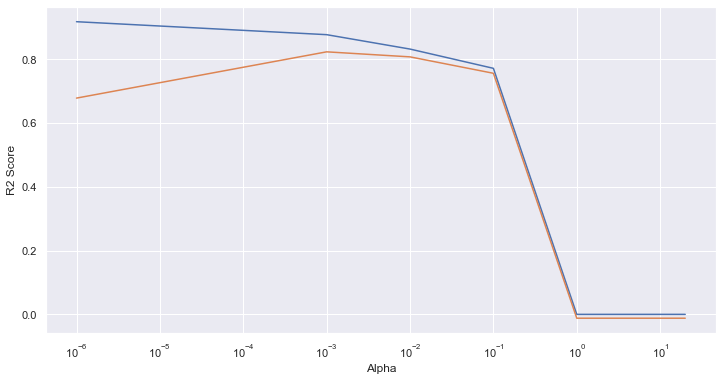

In [1692]:
r2_score(cv_result_train_lasso, True)

In [1693]:
print('For Lasso, the Best Alpha value = ', model_cv.best_params_['alpha'])

For Lasso, the Best Alpha value =  0.001


In [1694]:
# Now that we have optimal value of alpha = 0.001, we can use this alpha to run the model again
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8743455637207288
0.8581283795772723


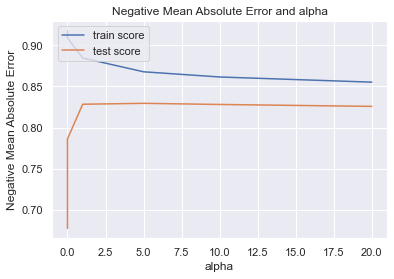

In [1695]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

## Ridge Regression Model

In [1696]:
#Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

0.9172236980349973
0.8402856774804213


In [1697]:
#Calculation of MSE & RMSE
mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse = mse**0.5

#Calculate the RSS
rss = np.sum(np.square(y_test - y_test_pred))

print(rss, rmse)

73.22531337599207 0.6394355566454881


In [1698]:
# Gridsearch Operation on Training data set
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0, 25.0]}

model = Ridge()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0,
                                   25.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [1710]:
cv_result_train_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_train_ridge['param_alpha'] = cv_result_train_ridge['param_alpha'].astype('float32')
cv_result_train_ridge.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002991,0.000601,0.002142,0.000720,0.001,{'alpha': 0.001},0.902073,0.418663,0.890831,0.676943,0.437506,0.899911,0.539214,0.284971,0.883710,0.867173,0.680100,0.228394,8,0.917956,0.918352,0.918805,0.917690,0.914180,0.918308,0.916226,0.916757,0.918466,0.921133,0.917787,0.001727
1,0.002551,0.000472,0.001489,0.000491,0.010,{'alpha': 0.01},0.902441,0.419625,0.890344,0.683614,0.507122,0.899924,0.596048,0.366179,0.884342,0.866741,0.701638,0.204270,7,0.917596,0.918349,0.918464,0.917363,0.913912,0.917954,0.915947,0.916499,0.918113,0.920786,0.917498,0.001713
2,0.002764,0.000673,0.001669,0.000582,0.100,{'alpha': 0.1},0.901920,0.428242,0.884276,0.712067,0.780537,0.898347,0.811846,0.697478,0.884222,0.863245,0.786218,0.139040,6,0.907574,0.918058,0.909004,0.908238,0.905453,0.908065,0.907153,0.908292,0.908359,0.911119,0.909131,0.003267
3,0.002986,0.000589,0.001564,0.000595,1.000,{'alpha': 1.0},0.894494,0.467260,0.875979,0.732383,0.911004,0.892706,0.884784,0.878691,0.882756,0.863985,0.828404,0.129291,2,0.880299,0.910468,0.883213,0.885665,0.878288,0.880667,0.879842,0.881636,0.882091,0.884392,0.884656,0.008853
4,0.002569,0.000478,0.001474,0.000502,5.000,{'alpha': 5.0},0.882116,0.491228,0.880123,0.733599,0.912538,0.881967,0.871285,0.893310,0.882799,0.866019,0.829498,0.121900,1,0.863030,0.895653,0.865565,0.873552,0.860071,0.863178,0.863534,0.863343,0.864640,0.866118,0.867868,0.009841
5,0.002828,0.000620,0.001463,0.000476,10.000,{'alpha': 10.0},0.876169,0.494142,0.882300,0.733244,0.910390,0.877138,0.865694,0.895826,0.881537,0.864972,0.828141,0.120485,3,0.856824,0.889676,0.858751,0.868542,0.853424,0.856864,0.857576,0.856424,0.858091,0.859371,0.861554,0.010084
6,0.002853,0.000415,0.001584,0.000473,20.000,{'alpha': 20.0},0.870092,0.494384,0.883209,0.732722,0.907575,0.871666,0.858888,0.897008,0.879395,0.863015,0.825795,0.119571,4,0.850727,0.883903,0.852010,0.863028,0.846885,0.850600,0.851498,0.849537,0.851666,0.852819,0.855267,0.010342
7,0.002453,0.000479,0.001718,0.000472,25.000,{'alpha': 25.0},0.868061,0.494137,0.883089,0.732491,0.906469,0.869562,0.856132,0.896969,0.878506,0.862193,0.824761,0.119279,5,0.848626,0.881928,0.849720,0.861026,0.844648,0.848451,0.849387,0.847191,0.849471,0.850590,0.853104,0.010424


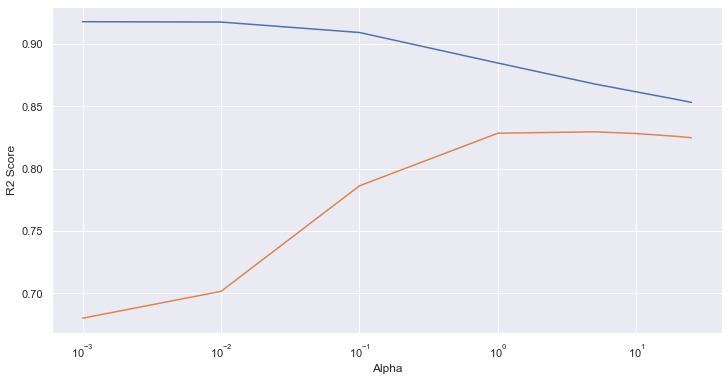

In [1700]:
# plot r2_score using the defined function for ridge
r2_score(cv_result_train_ridge, True)

In [1701]:
print('For Ridge, the Best Alpha value = ', model_cv.best_params_['alpha'])

For Ridge, the Best Alpha value =  5.0


In [1702]:
# Now that we have optimal value of alpha = 5.0, we can use this alpha to run the model again
#Ridge
ridge = Ridge(alpha=5)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

0.866937621666474
0.8690926935176255


In [1703]:
# ridge coefficients
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col = col.insert(0,'Constant')
list(zip(col,model_parameter))

[('Constant', -1.182),
 ('OverallQual', 0.351),
 ('BsmtFinSF1', 0.089),
 ('TotalBsmtSF', 0.064),
 ('CentralAir', -0.387),
 ('GrLivArea', 0.31),
 ('GarageCars', 0.16),
 ('MSZoning_FV', 0.369),
 ('MSZoning_RH', 0.22),
 ('MSZoning_RL', 0.346),
 ('MSZoning_RM', 0.046),
 ('LotConfig_CulDSac', 0.221),
 ('Neighborhood_BrDale', -0.256),
 ('Neighborhood_Crawfor', 0.323),
 ('Neighborhood_NridgHt', 0.195),
 ('Condition1_Norm', 0.209),
 ('Condition1_PosA', 0.192),
 ('Condition2_PosA', 0.075),
 ('Condition2_PosN', -0.567),
 ('Condition2_RRAe', -0.012),
 ('Condition2_RRNn', 0.076),
 ('HouseStyle_2.5Fin', -0.043),
 ('RoofStyle_Shed', 0.1),
 ('RoofMatl_CompShg', 0.172),
 ('RoofMatl_Membran', 0.15),
 ('RoofMatl_Metal', 0.052),
 ('RoofMatl_Roll', -0.017),
 ('RoofMatl_Tar&Grv', 0.143),
 ('RoofMatl_WdShake', 0.117),
 ('RoofMatl_WdShngl', 0.32),
 ('Exterior1st_BrkComm', -0.256),
 ('Exterior1st_BrkFace', 0.213),
 ('Exterior1st_VinylSd', 0.144),
 ('Exterior1st_WdShing', 0.126),
 ('Exterior2nd_AsphShn', -0.02

In [1704]:
def run_multiple_alphas(model,alphas):
    
    feature_ridge_df = pd.DataFrame(columns=['feature'], data=X_train.columns)
    feature_lasso_df = pd.DataFrame(columns=['feature'], data=X_train.columns)
    
    for alpha in alphas:
        if model == 'ridge':
            ridge = Ridge(alpha=alpha)
            ridge.fit(X_train, y_train)
            # Creating feature/coefficient map for future use
            feature_ridge_df['Alpha: '+str(alpha)] = ridge.coef_
        elif model == 'lasso':
            lasso = Lasso(alpha=alpha)
            lasso.fit(X_train, y_train)
            # Creating feature/coefficient map for future use
            feature_lasso_df['Alpha: '+str(alpha)] = lasso.coef_
    
    if model == 'ridge':
        return feature_ridge_df
    else:
        return feature_lasso_df

In [1705]:
lasso_df = run_multiple_alphas('lasso',[0.001,0.002,0.01,0.02,0.05,5,25])

In [1706]:
lasso_df.head()

,feature,Alpha: 0.001,Alpha: 0.002,Alpha: 0.01,Alpha: 0.02,Alpha: 0.05,Alpha: 5,Alpha: 25
0,OverallQual,0.349378,0.358949,0.412674,0.432902,0.447949,0.0,0.0
1,BsmtFinSF1,0.092537,0.091436,0.080667,0.076190,0.060224,0.0,0.0
2,TotalBsmtSF,0.064646,0.064401,0.077874,0.083869,0.097479,0.0,0.0
3,CentralAir,-0.400647,-0.387669,-0.300311,-0.159456,-0.000000,-0.0,-0.0
4,GrLivArea,0.322117,0.311511,0.272150,0.253420,0.227290,0.0,0.0


In [1707]:
print(lasso_df[lasso_df['Alpha: 0.001'] == 0][['feature', 'Alpha: 0.001']].shape)
print(lasso_df[lasso_df['Alpha: 0.002'] == 0][['feature', 'Alpha: 0.002']].shape)
print(lasso_df[lasso_df['Alpha: 0.01'] == 0][['feature', 'Alpha: 0.01']].shape)
print(lasso_df[lasso_df['Alpha: 0.02'] == 0][['feature', 'Alpha: 0.02']].shape)
print(lasso_df[lasso_df['Alpha: 0.05'] == 0][['feature', 'Alpha: 0.05']].shape)
print(lasso_df[lasso_df['Alpha: 5'] == 0][['feature', 'Alpha: 5']].shape)

(17, 2)
(24, 2)
(36, 2)
(40, 2)
(44, 2)
(50, 2)


In [1708]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002991,0.000601,0.002142,0.000720,0.001,{'alpha': 0.001},0.902073,0.418663,0.890831,0.676943,0.437506,0.899911,0.539214,0.284971,0.883710,0.867173,0.680100,0.228394,8,0.917956,0.918352,0.918805,0.917690,0.914180,0.918308,0.916226,0.916757,0.918466,0.921133,0.917787,0.001727
1,0.002551,0.000472,0.001489,0.000491,0.01,{'alpha': 0.01},0.902441,0.419625,0.890344,0.683614,0.507122,0.899924,0.596048,0.366179,0.884342,0.866741,0.701638,0.204270,7,0.917596,0.918349,0.918464,0.917363,0.913912,0.917954,0.915947,0.916499,0.918113,0.920786,0.917498,0.001713
2,0.002764,0.000673,0.001669,0.000582,0.1,{'alpha': 0.1},0.901920,0.428242,0.884276,0.712067,0.780537,0.898347,0.811846,0.697478,0.884222,0.863245,0.786218,0.139040,6,0.907574,0.918058,0.909004,0.908238,0.905453,0.908065,0.907153,0.908292,0.908359,0.911119,0.909131,0.003267
3,0.002986,0.000589,0.001564,0.000595,1,{'alpha': 1.0},0.894494,0.467260,0.875979,0.732383,0.911004,0.892706,0.884784,0.878691,0.882756,0.863985,0.828404,0.129291,2,0.880299,0.910468,0.883213,0.885665,0.878288,0.880667,0.879842,0.881636,0.882091,0.884392,0.884656,0.008853
4,0.002569,0.000478,0.001474,0.000502,5,{'alpha': 5.0},0.882116,0.491228,0.880123,0.733599,0.912538,0.881967,0.871285,0.893310,0.882799,0.866019,0.829498,0.121900,1,0.863030,0.895653,0.865565,0.873552,0.860071,0.863178,0.863534,0.863343,0.864640,0.866118,0.867868,0.009841


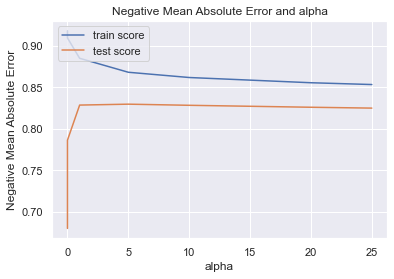

In [1709]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

## Conclusion :

### Following are the scores for both Lasso and Ridge Regressions.
- Lasso : Train : 0.8743   Test : 0.8581
- Ridge : Train : 0.8669   Test : 0.8690


- Optimal Value of lamda for Lasso : 0.001
- Optimal Value of lamda for Ridge : 5
 